.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

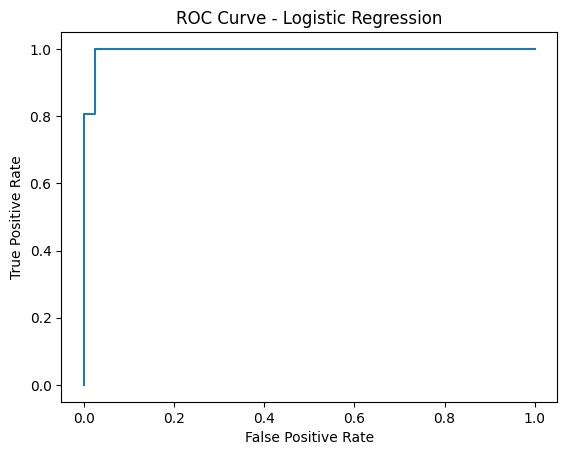

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
print(data.DESCR)
#print(data)

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Number of Missing Values: " + str(x.isnull().sum().sum()))

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size    = 0.2,
    random_state = 42,
    stratify     = y
)
print("Training Shape: " + str(x_train.shape))
print("Test Shape: " + str(x_test.shape))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train.head())
print(x_train_scaled)

from sklearn.linear_model import LogisticRegression

Log_Reg_Model = LogisticRegression()
Log_Reg_Model.fit(x_train_scaled, y_train)

y_pred = Log_Reg_Model.predict(x_test_scaled)
y_prob = Log_Reg_Model.predict_proba(x_test_scaled)[:, 1]

print(y_pred.shape)

print(y_pred)
print(y_prob)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

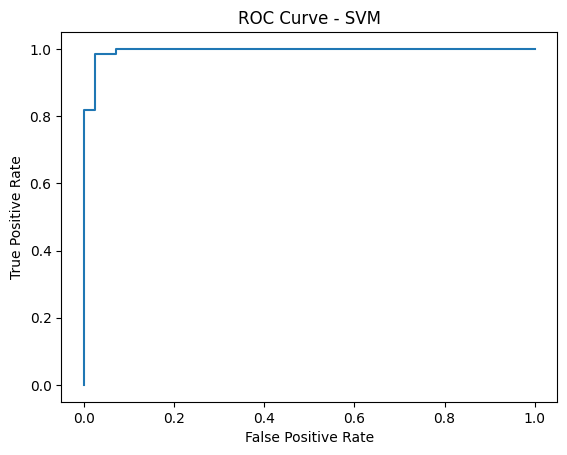

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
print(data.DESCR)
#print(data)

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Number of Missing Values: " + str(x.isnull().sum().sum()))

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size    = 0.2,
    random_state = 42,
    stratify     = y
)
print("Training Shape: " + str(x_train.shape))
print("Test Shape: " + str(x_test.shape))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train.head())
print(x_train_scaled)

from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', probability = True, random_state = 42)

svm_model.fit(x_train_scaled, y_train)

y_pred_svm = svm_model.predict(x_test_scaled)
y_prob_svm = svm_model.predict_proba(x_test_scaled)[:, 1]

print(y_pred_svm.shape)

print(y_pred_svm)
print(y_prob_svm)

print(confusion_matrix(y_test, y_pred_svm))

print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_prob_svm))

fpr, tpr, _ = roc_curve(y_test, y_prob_svm)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.show()

(114,)
[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]
[0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
[[39  3]
 [ 6 66]]
Accuracy:  0.9210526315789473
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

ROC-AUC Score:  0.9226190476190476


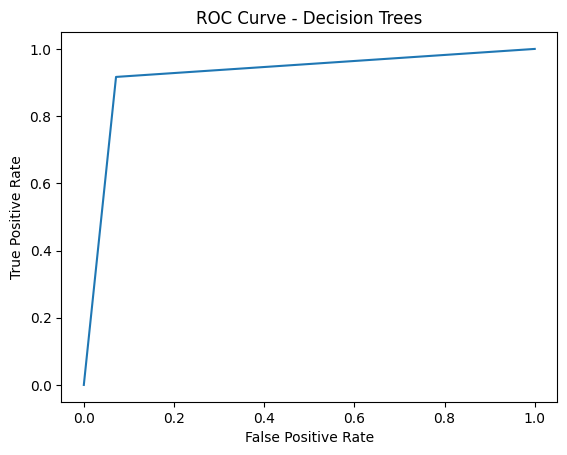

In [28]:
'''
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
print(data.DESCR)
#print(data)

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Number of Missing Values: " + str(x.isnull().sum().sum()))

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size    = 0.2,
    random_state = 42,
    stratify     = y
)
print("Training Shape: " + str(x_train.shape))
print("Test Shape: " + str(x_test.shape))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train.head())
print(x_train_scaled)
'''

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train) # Decision trees dont need scaled datasets

y_pred_tree = clf.predict(x_test)
y_prob_tree = clf.predict_proba(x_test)[:, 1]

print(y_pred_tree.shape)

print(y_pred_tree)
print(y_prob_tree)

# from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_tree))

'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
'''

print("Accuracy: ", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_prob_tree))

'''
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
'''

fpr, tpr, _ = roc_curve(y_test, y_prob_tree)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Trees")
plt.show()

(114,)
[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]
[0.   1.   0.12 0.28 0.01 0.99 0.95 0.01 0.   0.   0.98 0.12 0.99 0.
 0.01 0.87 0.52 0.86 0.99 0.83 0.01 0.34 0.99 0.97 0.99 0.31 0.01 1.
 1.   0.97 0.76 1.   0.99 0.84 0.   0.57 1.   0.69 0.81 0.   0.99 1.
 1.   0.   0.01 0.6  1.   1.   0.65 0.   0.96 0.87 1.   0.67 0.99 1.
 1.   0.02 0.02 0.95 1.   1.   0.99 0.99 0.   0.65 0.67 0.99 0.93 0.86
 0.94 1.   1.   0.01 0.   0.02 0.1  1.   0.99 1.   0.97 1.   0.01 1.
 0.36 0.98 0.97 0.98 0.97 0.97 0.84 0.99 0.   0.04 0.02 1.   0.01 1.
 0.   0.9  0.05 0.   0.1  0.98 0.   0.   0.98 0.   0.91 0.   0.63 0.
 0.84 1.  ]
[[39  3]
 [ 2 70]]
Accuracy:  0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97    

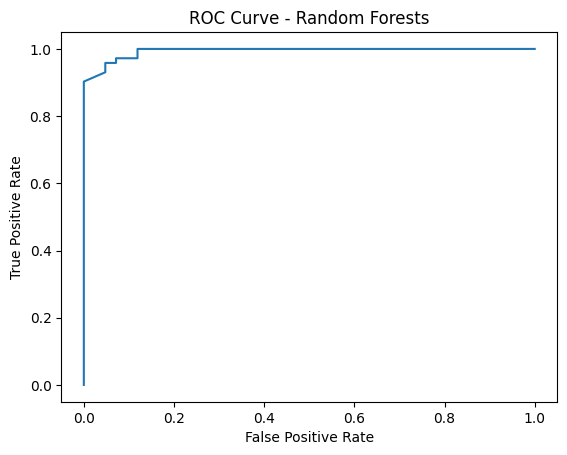

In [29]:
'''
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
print(data.DESCR)
#print(data)

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Number of Missing Values: " + str(x.isnull().sum().sum()))

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size    = 0.2,
    random_state = 42,
    stratify     = y
)
print("Training Shape: " + str(x_train.shape))
print("Test Shape: " + str(x_test.shape))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train.head())
print(x_train_scaled)
'''

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(x_train, y_train)

y_pred_Rtree = classifier.predict(x_test)
y_prob_Rtree = classifier.predict_proba(x_test)[:, 1]

print(y_pred_Rtree.shape)

print(y_pred_Rtree)
print(y_prob_Rtree)

# from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_Rtree))

'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
'''

print("Accuracy: ", accuracy_score(y_test, y_pred_Rtree))
print(classification_report(y_test, y_pred_Rtree))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_prob_Rtree))

'''
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
'''

fpr, tpr, _ = roc_curve(y_test, y_prob_Rtree)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forests")
plt.show()

[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]
[3.32960831e-04 9.99812607e-01 3.22329110e-03 1.23776397e-01
 4.37245214e-04 9.99170857e-01 9.99738004e-01 3.32960831e-04
 5.67518042e-04 3.38090181e-04 9.99428684e-01 1.23161193e-03
 9.99756802e-01 4.55241638e-04 3.92291022e-04 9.69643574e-01
 7.62783612e-01 9.75790136e-01 9.99734770e-01 9.98405124e-01
 1.43958597e-03 5.72687058e-02 9.99269851e-01 9.99274843e-01
 9.99134364e-01 8.00451867e-01 3.38090181e-04 9.99143440e-01
 9.99666867e-01 9.99561680e-01 9.96027174e-01 9.99812607e-01
 9.99076640e-01 9.84021042e-01 4.12117862e-04 9.38751946e-01
 9.99626575e-01 9.77874327e-01 9.65797032e-01 3.66055920e-04
 9.99666973e-01 9.99746278e-01 9.98245418e-01 4.56866304e-04
 4.06708815e-04 9.68975795e-01 9.99786698e-01 9.99400021e-01
 9.15879166e-01 4.56866304e-04 9.99

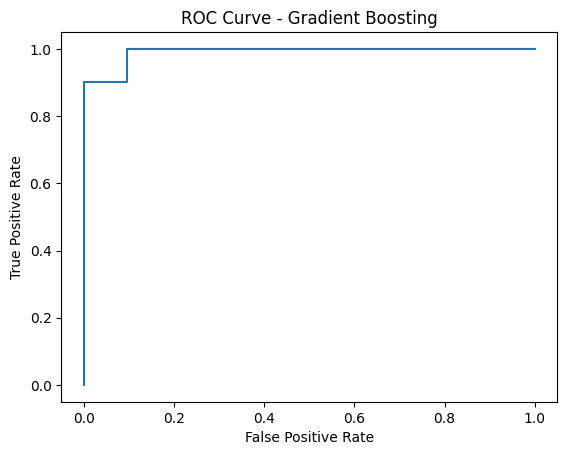

In [30]:
'''
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
print(data.DESCR)
#print(data)

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Number of Missing Values: " + str(x.isnull().sum().sum()))

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size    = 0.2,
    random_state = 42,
    stratify     = y
)
print("Training Shape: " + str(x_train.shape))
print("Test Shape: " + str(x_test.shape))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train.head())
print(x_train_scaled)
'''

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42, max_depth = 3)
gbc.fit(x_train, y_train)

y_pred_gbc = gbc.predict(x_test)
y_prob_gbc = gbc.predict_proba(x_test)[:, 1]

# print(y_pred_gbc.shape)

print(y_pred_gbc)
print(y_prob_gbc)

# from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_gbc))

'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
'''

print("Accuracy: ", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_prob_gbc))

'''
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
'''

fpr, tpr, _ = roc_curve(y_test, y_prob_gbc)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.show()

In [31]:
GB_accuracy = accuracy_score(y_test, y_pred_gbc)
RF_accuracy = accuracy_score(y_test, y_pred_Rtree)
DT_accuracy = accuracy_score(y_test, y_pred_tree)
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
LR_accuracy = accuracy_score(y_test, y_pred)
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "SVM",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "Accuracy": [
        LR_accuracy,
        SVM_accuracy,
        DT_accuracy,
        RF_accuracy,
        GB_accuracy]
})

print(results.sort_values(by = "Accuracy", ascending = False))

                 Model  Accuracy
0  Logistic Regression  0.982456
1                  SVM  0.982456
3        Random Forest  0.956140
4    Gradient Boosting  0.956140
2        Decision Tree  0.921053


Accuracy:  0.9210526315789473
Confusion Matrix: 
[[38  4]
 [ 5 67]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

ROC-AUC Score:  0.9262566137566137


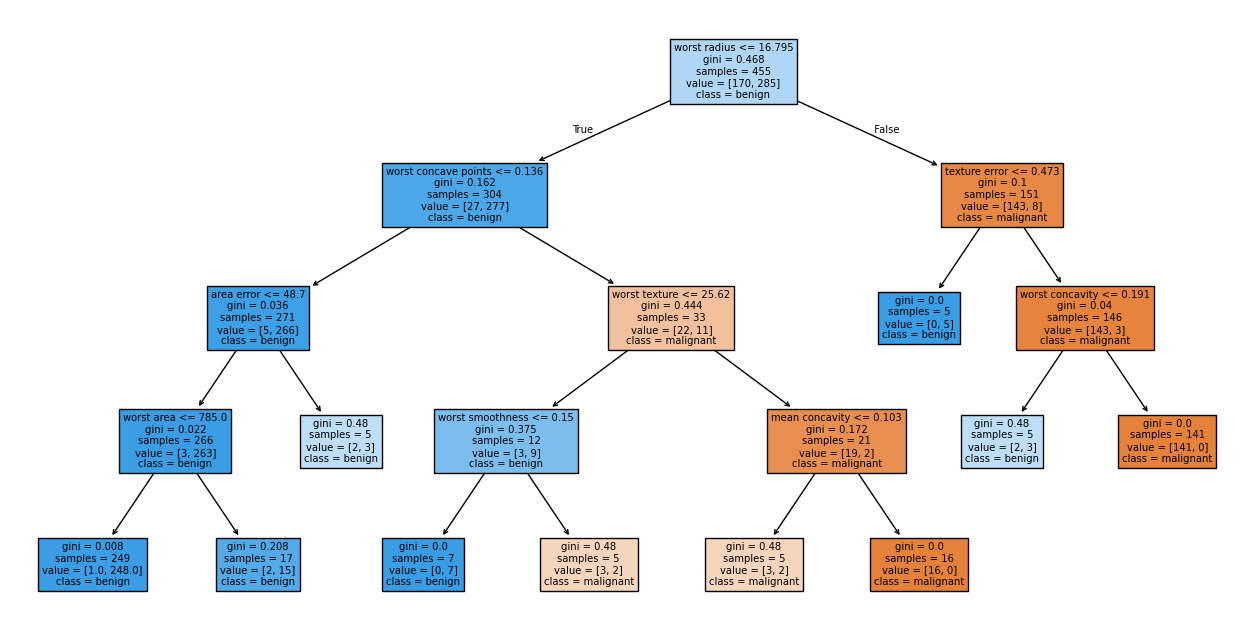

In [32]:
# Second year task -> regularization 1

from sklearn.tree import plot_tree

DT_regularized = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5, random_state = 42)

DT_regularized.fit(x_train, y_train)

DT_Reg_y_pred = DT_regularized.predict(x_test)
DT_Reg_y_prob = DT_regularized.predict_proba(x_test)[:, 1]

DT_Reg_accuracy = accuracy_score(y_test, DT_Reg_y_pred)
print("Accuracy: ", DT_Reg_accuracy)

DT_Reg_cm = confusion_matrix(y_test, DT_Reg_y_pred)
print("Confusion Matrix: ")
print(DT_Reg_cm)

print("Classification Report: ")
print(classification_report(y_test, DT_Reg_y_pred))

DT_Reg_auc = roc_auc_score(y_test, DT_Reg_y_prob)
print("ROC-AUC Score: ", DT_Reg_auc)

plt.figure(figsize = (16, 8))
plot_tree(DT_regularized, feature_names = x.columns, class_names = data.target_names, filled = True)
plt.show()

Accuracy:  0.9385964912280702
Confusion Matrix: 
[[38  4]
 [ 3 69]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

ROC-AUC Score:  0.9439484126984128


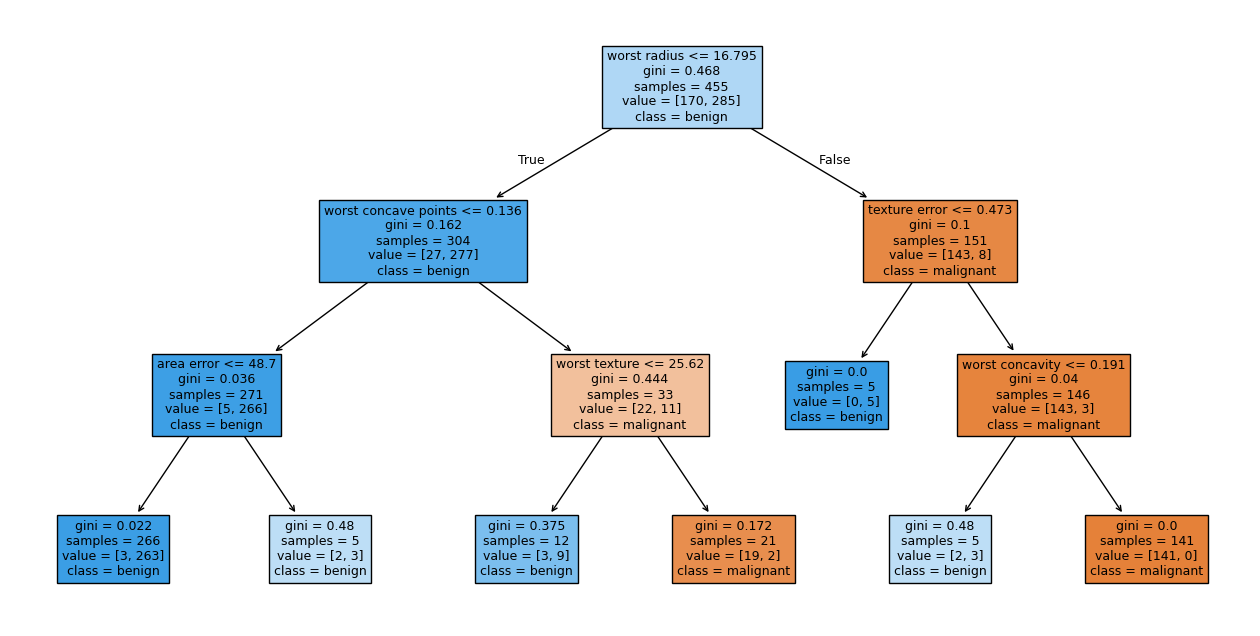

In [25]:
DT_regularized_2 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5, random_state = 42)

DT_regularized_2.fit(x_train, y_train)

DT_Reg_y_pred_2 = DT_regularized_2.predict(x_test)
DT_Reg_y_prob_2 = DT_regularized_2.predict_proba(x_test)[:, 1]

DT_Reg2_accuracy = accuracy_score(y_test, DT_Reg_y_pred_2)
print("Accuracy: ", DT_Reg2_accuracy)

DT_Reg2_cm = confusion_matrix(y_test, DT_Reg_y_pred_2)
print("Confusion Matrix: ")
print(DT_Reg2_cm)

print("Classification Report: ")
print(classification_report(y_test, DT_Reg_y_pred_2))

DT_Reg2_auc = roc_auc_score(y_test, DT_Reg_y_prob_2)
print("ROC-AUC Score: ", DT_Reg2_auc)

plt.figure(figsize = (16, 8))
plot_tree(DT_regularized_2, feature_names = x.columns, class_names = data.target_names, filled = True)
plt.show()

I have decided to test regularization using decision trees. As we can see from the above code blocks, I have reduced the complexity of the model. After reducing it I ran it and saw the accuracy has increased. This is a clear example of bias-variance tradeoff. By reducing the complexity of the model, we essentially increased the bias. But by doing that we lowered the variance thereby increasing the accuracy. This doesn't mean we want the model to be too simple, this will again reduce the accuracy. It's important to find the balance where the bias isn't too much and the variance isn't too high. That's the sweet spot we are trying the achieve.